In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from treelib import Tree

In [2]:
from sklearn.datasets import load_boston, load_breast_cancer

from sklearn.tree import plot_tree, DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

* `_parent`: 각 노드를 index로 하며 각 노드의 부모 노드를 원소로 가지는 array를 리턴하는 함수. root node의 부모 노드는 자기 자신  
* `_depth`: 각 노드를 index로 하며 각 노드의 깊이를 원소로 가지는 array를 리턴하는 함수. root node의 깊이는 0  
* `print_tree_vertical`: 위에서 아래로 내려가는 방향  
* `print_tree`: 왼쪽에서 오른쪽으로 뻗어 감. treelib 라이브러리 이용.  

In [7]:
class represent_tree:
    def __init__(self, fitted_model):
        self.model = fitted_model
        self.n_nodes = self.model.tree_.node_count
        self.left = self.model.tree_.children_left.tolist()
        self.right = self.model.tree_.children_right.tolist()
    
    def _depth(self):
        depth_list = [0] * self.n_nodes
        for n in range(1, self.n_nodes):
            if n%2==0:
                parent = self.right.index(n)
                depth_list[n] = depth_list[parent]+1
            else:
                parent = self.left.index(n)
                depth_list[n] = depth_list[parent]+1
        return np.array(depth_list)

    def _parent(self):
        parent_list = [0] * self.n_nodes

        for n in range(1, self.n_nodes):
            if n%2==0:
                parent = self.right.index(n)
                parent_list[n] = parent
            else:
                parent = self.left.index(n)
                parent_list[n] = parent
        return np.array(parent_list)
    
    def _isfloat(self, num, d):
        if (type(num) == float) | (type(num) == np.float64):
            return round(num, d)
        else:
            return num
    
    def print_tree_vertical(self, round_digit = 3, feat_names=None):
        max_depth = self.model.tree_.max_depth
        parent_node = self._parent()
        node_depth = self._depth()
        n_feats = self.model.n_features_
        if feat_names is None:
            feat_names = list('F{}'.format(str(i).zfill(len(str(n_feats)))) for i in range(n_feats))
        feat_in_node = self.model.tree_.feature
        threshold = self.model.tree_.threshold
        impurity = self.model.tree_.impurity
        samples = self.model.tree_.n_node_samples
        if 'Reg' in str(self.model):
            values = self.model.tree_.value.flatten()
        else:
            values = self.model.tree_.value[:, 0, :]

        for dep in range(max_depth+1):
            print('Depth', dep)
            nodes = np.where(node_depth==dep)[0]
            child_parent = sorted((zip(nodes, [parent_node[i] for i in nodes])), key = lambda x: (x[1],x[0]) )
            #print(child_parent)
            nodes1 = [i[0] for i in child_parent]
            for node in nodes1:
                if feat_in_node[node] == -2:
                    print('node #{} *leaf*'.format(node), model_dt.criterion, '=', round(impurity[node], round_digit), 
                      'samples =', samples[node], 'value =', self._isfloat(values[node], round_digit), 'parent_node =', parent_node[node], end=' || ')
                else:
                    print('node #{}'.format(node), feat_names[feat_in_node[node]], '<=', round(threshold[node], round_digit), model_dt.criterion, '=', round(impurity[node], round_digit), 
                          'samples =', samples[node], 'value =', self._isfloat(values[node], round_digit), 'parent_node =', parent_node[node], end=' || ')
            print('\n')
            
    def print_tree(self, round_digit = 3, feat_names=None):
        max_depth = self.model.tree_.max_depth
        parent_node = self._parent()
        node_depth = self._depth()
        n_feats = self.model.n_features_
        if feat_names is None:
            feat_names = list('F{}'.format(str(i).zfill(len(str(n_feats)))) for i in range(n_feats))
        feat_in_node = self.model.tree_.feature
        threshold = self.model.tree_.threshold
        impurity = self.model.tree_.impurity
        samples = self.model.tree_.n_node_samples
        if 'Reg' in str(self.model):
            values = self.model.tree_.value.flatten()
        else:
            values = self.model.tree_.value[:, 0, :]
        
        tree = Tree()
        
        for node in range(self.n_nodes):
            
            if node == 0:
                node_list = ['node #{}'.format(node), feat_names[feat_in_node[node]], '<=', round(threshold[node], round_digit), model_dt.criterion, '=', 
                             round(impurity[node], round_digit), 'samples =', samples[node], 'value =', self._isfloat(values[node], round_digit),]
                tree.create_node(' '.join([str(i) for i in node_list]), node)
            elif feat_in_node[node] == -2:
                node_list = ['node #{}'.format(node), model_dt.criterion, '=', round(impurity[node], round_digit), 
                      'samples =', samples[node], 'value =', self._isfloat(values[node], round_digit), '*leaf*']
                tree.create_node(' '.join([str(i) for i in node_list]), node, parent = parent_node[node])
            else:
                node_list = ['node #{}'.format(node), feat_names[feat_in_node[node]], '<=', round(threshold[node], round_digit), model_dt.criterion, '=', 
                             round(impurity[node], round_digit), 'samples =', samples[node], 'value =', self._isfloat(values[node], round_digit),]
                tree.create_node(' '.join([str(i) for i in node_list]), node, parent = parent_node[node])
        tree.show()
            
    def print_nodes(self, feat_names=None):
        max_depth = self.model.tree_.max_depth
        parent_node = self._parent()
        node_depth = self._depth()
        feat_in_node = self.model.tree_.feature

        for dep in range(max_depth+1):
            print('Depth', dep)
            nodes = np.where(node_depth==dep)[0]
            child_parent = sorted((zip(nodes, [parent_node[i] for i in nodes])), key = lambda x: (x[1],x[0]) )
            nodes1 = [i[0] for i in child_parent]
            for node in nodes1:
                if feat_in_node[node] == -2:
                    print('n #{} *leaf*'.format(node),  'parent =', parent_node[node], end=' || ')
                else:
                    print('n #{}'.format(node),  'parent =', parent_node[node], end=' || ')
            print('\n')  

# Load data

In [3]:
data = load_boston()

X = data['data']
y = data['target']

feature_names = data['feature_names']

In [4]:
data_clf = load_breast_cancer()

X_clf = data_clf['data']
y_clf = data_clf['target']

feature_names_clf = data_clf['feature_names']

# Train and Represent tree

## Regression

In [5]:
model_dt = DecisionTreeRegressor(max_leaf_nodes=10, random_state=42)
model_dt.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=42)

In [8]:
rt = represent_tree(model_dt)
rt.print_tree(round_digit=3, feat_names=feature_names)

node #0 RM <= 6.941 mse = 84.42 samples = 506 value = 22.533
├── node #1 LSTAT <= 14.4 mse = 40.273 samples = 430 value = 19.934
│   ├── node #3 DIS <= 1.385 mse = 26.009 samples = 255 value = 23.35
│   │   ├── node #7 CRIM <= 10.592 mse = 78.146 samples = 5 value = 45.58
│   │   │   ├── node #17 mse = 0.0 samples = 4 value = 50.0 *leaf*
│   │   │   └── node #18 mse = -0.0 samples = 1 value = 27.9 *leaf*
│   │   └── node #8 RM <= 6.543 mse = 14.885 samples = 250 value = 22.905
│   │       ├── node #10 mse = 11.694 samples = 55 value = 27.427 *leaf*
│   │       └── node #9 mse = 8.39 samples = 195 value = 21.63 *leaf*
│   └── node #4 CRIM <= 6.992 mse = 19.276 samples = 175 value = 14.956
│       ├── node #11 mse = 11.391 samples = 101 value = 17.138 *leaf*
│       └── node #12 mse = 14.674 samples = 74 value = 11.978 *leaf*
└── node #2 RM <= 7.437 mse = 79.729 samples = 76 value = 37.238
    ├── node #5 CRIM <= 7.393 mse = 41.296 samples = 46 value = 32.113
    │   ├── node #13 mse = 2

* The above result is the same with the result of plot_tree in scikit-learn library.

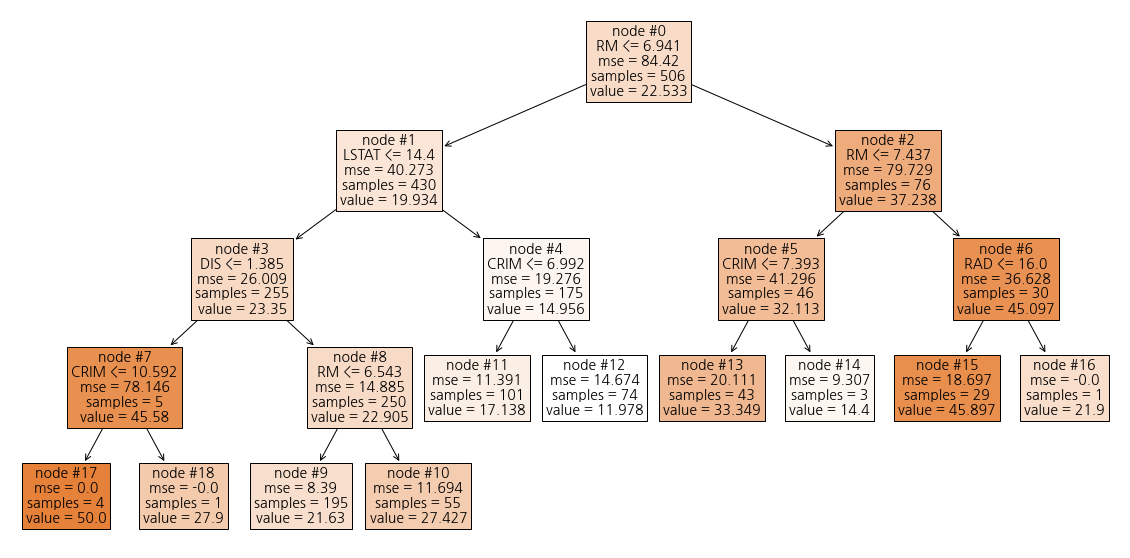

In [9]:
plt.figure(figsize=(20,10))
plot_tree(model_dt, node_ids=True, fontsize=14, feature_names=data['feature_names'], filled=True)
plt.show()

## Classification

In [10]:
model_clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)
model_clf.fit(X_clf, y_clf)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

In [12]:
rt_clf = represent_tree(model_clf)
rt_clf.print_tree(round_digit=3, feat_names=feature_names_clf)

node #0 worst radius <= 16.795 mse = 0.468 samples = 569 value = [212. 357.]
├── node #1 worst concave points <= 0.136 mse = 0.159 samples = 379 value = [ 33. 346.]
│   ├── node #3 mse = 0.03 samples = 333 value = [  5. 328.] *leaf*
│   └── node #4 worst texture <= 25.67 mse = 0.476 samples = 46 value = [28. 18.]
│       ├── node #5 worst area <= 810.3 mse = 0.332 samples = 19 value = [ 4. 15.]
│       │   ├── node #11 mse = 0.124 samples = 15 value = [ 1. 14.] *leaf*
│       │   └── node #12 mse = 0.375 samples = 4 value = [3. 1.] *leaf*
│       └── node #6 mean concavity <= 0.097 mse = 0.198 samples = 27 value = [24.  3.]
│           ├── node #13 mean texture <= 19.435 mse = 0.5 samples = 6 value = [3. 3.]
│           │   ├── node #15 mse = 0.0 samples = 3 value = [0. 3.] *leaf*
│           │   └── node #16 mse = 0.0 samples = 3 value = [3. 0.] *leaf*
│           └── node #14 mse = 0.0 samples = 21 value = [21.  0.] *leaf*
└── node #2 mean texture <= 16.11 mse = 0.109 samples = 190 v

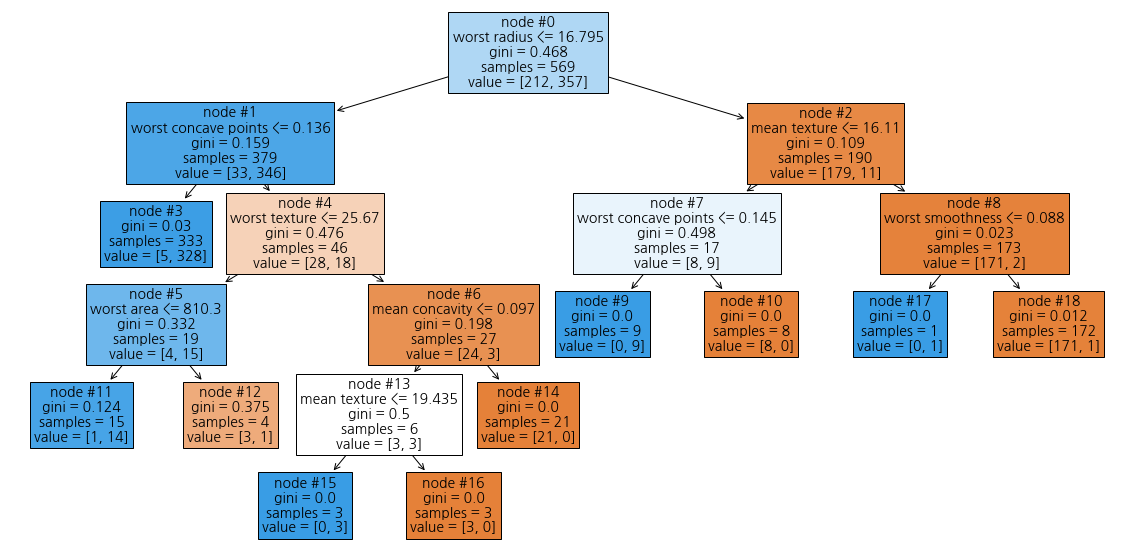

In [14]:
plt.figure(figsize=(20,10))
plot_tree(model_clf, node_ids=True, fontsize=14, feature_names=feature_names_clf, filled=True)
plt.show()